In [1]:
import numpy as np
import pandas as pd
from PIL import Image

from skimage.measure import structural_similarity as ssim
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def calculate_reshape_size(img):
    reshape_size = list(img.size[::-1])
    reshape_size.append(3)
    return tuple(reshape_size)

In [2]:
def convert_rgb_grayscale(rgb):
    grayscale = convert_rgb_grayscale_linear(rgb)
    transformation_function = check_nonlinear_formula(grayscale)
    grayscale = transformation_function(grayscale)
    return grayscale

def convert_rgb_grayscale_linear(rgb):
    r = rgb[0]/255.
    g = rgb[1]/255.
    b = rgb[2]/255.
    RCOEFF = .2126
    GCOEFF = .7152
    BCOEFF = .0722
    grayscale = r * RCOEFF + g * GCOEFF + b * BCOEFF
    return grayscale

def check_nonlinear_formula(grayscale):
    LINEAR_CUTOFF = .0031308
    if grayscale <= LINEAR_CUTOFF:
        transform_func = grayscale_linear_transformation
    else:
        transform_func = grayscale_nonlinear_transformation
    return transform_func

def grayscale_linear_transformation(grayscale):
    COEFF = 12.92
    return COEFF * grayscale

def grayscale_nonlinear_transformation(grayscale):
    COEFF = 1.055
    EXP = 1/2.4
    INTERCEPT = .055
    return COEFF * pow(grayscale, EXP) - INTERCEPT

In [20]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

def compare_images(imageA, imageB, title, reshape_size, saveAs):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB, win_size = 3)
    
    imageA = imageA.reshape(reshape_size)
    imageB = imageB.reshape(reshape_size)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")

    # show the images
    if saveAs:
        plt.savefig(saveAs)
    plt.show()

In [33]:
def import_image(file_path):
    f = Image.open(file_path, 'r')
    return f

def convert_image_to_np_array(img):
    img_np = np.asarray(img.getdata()).astype(float)
    return img_np

In [18]:
whiskey = import_image('../assets/img/whiskey-glasses.jpg')
whiskey_np = convert_image_to_np_array(whiskey)
whiskeydog = import_image('../assets/img/whiskey-glasses_edited.jpg')
whiskeydog_np = convert_image_to_np_array(whiskeydog)
reshape_size = calculate_reshape_size(whiskey)

In [41]:
img1 = import_image('../assets/img/books.jpg')
img1_np = convert_image_to_np_array(img1)
img2 = import_image('../assets/img/books2.jpg')
img2_np = convert_image_to_np_array(img2)
reshape_size = calculate_reshape_size(img1)

In [42]:
print img1.size
print img2.size
print reshape_size

(454, 478)
(454, 478)
(478, 454, 3)


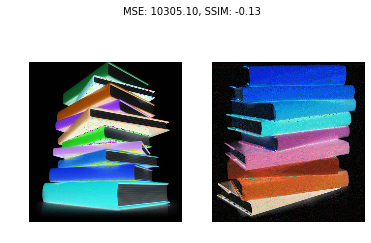

In [46]:
compare_images(img1_np, img2_np, 'US', reshape_size = reshape_size, saveAs = False)